# Analysis

Ketapril is the least effective treatment with the highest mean tumor volume and largest variance, followed by naftisol. There is a positive relationship between Capomulion mice's weight and mean tumor volume, with a correlation of 8.4. 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [93]:
# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results,mouse_metadata, how = "left", on = "Mouse ID")
merged_data_df

# Modify Age header
merged_data_df = merged_data_df.rename(columns={'Age_months': 'Age (months)'})

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [94]:
# Checking the number of mice.
total_mice = len(merged_data_df["Mouse ID"].unique())
total_mice

249

In [95]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_data_df[merged_data_df.duplicated(["Mouse ID","Timepoint"],keep = False)]
duplicate["Mouse ID"].values

array(['g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989',
       'g989', 'g989'], dtype=object)

In [96]:
# Get all the data for the duplicate mouse ID. 
merged_data_df.loc[(merged_data_df["Mouse ID"] == "g989"),:]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [97]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_data_df = merged_data_df.loc[(merged_data_df["Mouse ID"] != "g989"),:]
merged_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [98]:
# Checking the number of mice in the clean DataFrame.
len(clean_merged_data_df["Mouse ID"].value_counts())

248

# Summary Statistics

In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = clean_merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = clean_merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev_tumor_volume = clean_merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = clean_merged_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_statistics_dict= {"Mean Tumor Volume":mean_tumor_volume,"Median Tumor Volume":median_tumor_volume,
                         "Tumor Volume Variance":variance_tumor_volume,"Tumor Volume Std. Dev":stdev_tumor_volume,
                         "Tumor Volume Std. Err.":sem_tumor_volume}
summary_statistics_1 = pd.DataFrame(summary_statistics_dict)
summary_statistics_1


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_2 = clean_merged_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_statistics_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_data = clean_merged_data_df.groupby("Drug Regimen")["Mouse ID"].count()
drug_data_sort = drug_data.sort_values(ascending = False)
drug_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

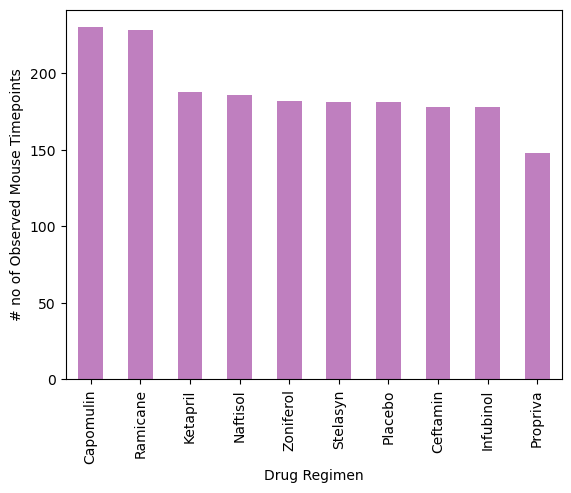

In [102]:
drug_data_plot = drug_data_sort.plot(kind="bar",color="purple",alpha= 0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("# no of Observed Mouse Timepoints")
plt.tight_layout
plt.show()


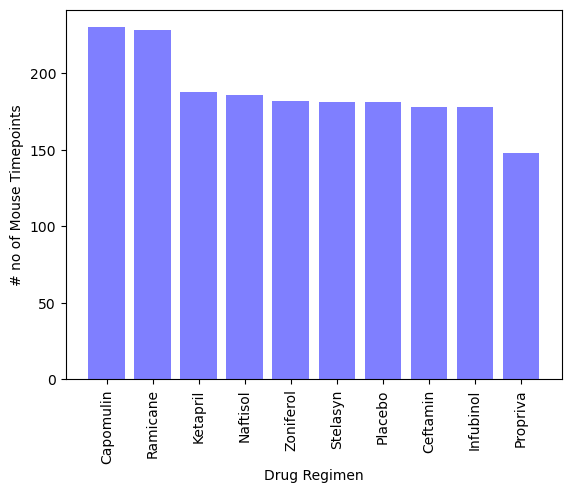

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange (len(drug_data))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, drug_data_sort,color = "blue",alpha = 0.5)
plt.xticks(tick_locations,drug_data_sort.index,rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# no of Mouse Timepoints")
plt.tight_layout
plt.show()

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_data = clean_merged_data_df["Sex"].value_counts()
sex_data

Sex
Male      958
Female    922
Name: count, dtype: int64

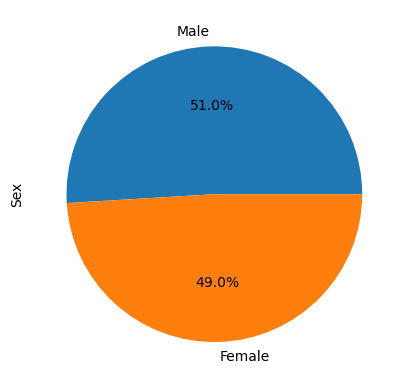

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Sex_data_plot2 = sex_data.plot.pie(labels=sex_data.index,autopct="%1.1f%%")
plt.ylabel("Sex")
Sex_data_plot2
plt.show()


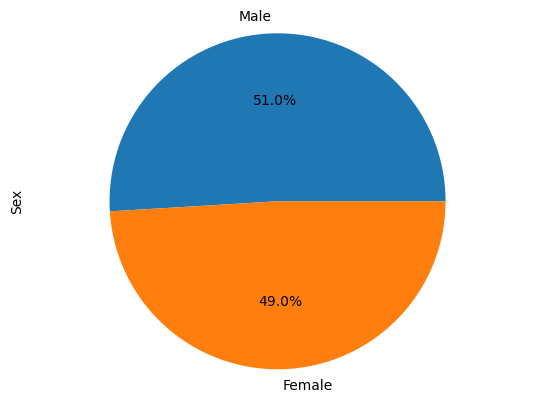

In [120]:
plt.pie(mouse_pie_df,labels=["Male","Female"], autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel('Sex')
plt.show()


# Quartiles, Outliers and Boxplots

In [123]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Mouse_max_timepoint = clean_merged_data_df.groupby("Mouse ID")["Timepoint"].max()
Mouse_max_timepoint.reset_index

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merge_data = pd.merge(clean_merged_data_df,Mouse_max_timepoint , how = "right", on = "Mouse ID")
mouseID_data_maxTimepoint= merge_data.loc[(merge_data["Timepoint_x"]==merge_data["Timepoint_y"])]
mouse_data =mouseID_data_maxTimepoint.rename(columns={"Timepoint_x":"Maximum Timepoint"})
del mouse_data["Timepoint_y"]
mouse_data


,Mouse ID,Maximum Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
9,a203,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,70.717621,4,Placebo,Female,17,29
39,a275,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1839,z435,10,48.710661,0,Propriva,Female,12,26
1849,z578,45,30.638696,0,Ramicane,Male,11,16
1859,z581,45,62.754451,3,Infubinol,Female,24,25
1869,z795,45,65.741070,3,Naftisol,Female,13,29


In [155]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in Treatment_list:
    treatment_data = mouse_data.loc[mouse_data["Drug Regimen"]==treatment,:]
    # add subset 
    treatment_data = mouse_data.loc[mouse_data["Drug Regimen"]==treatment,:]
    final_tumor_volume = treatment_data["Tumor Volume (mm3)"]
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume[(final_tumor_volume< lower_bound)|(final_tumor_volume>upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")
    #plotting_data
    tumor_volume.append(final_tumor_volume)
   


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 275    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/kr/dnn4yz45639_qpcw2723y4t80000gn/T/ipykernel_3568/2179767113.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Treatment_list)


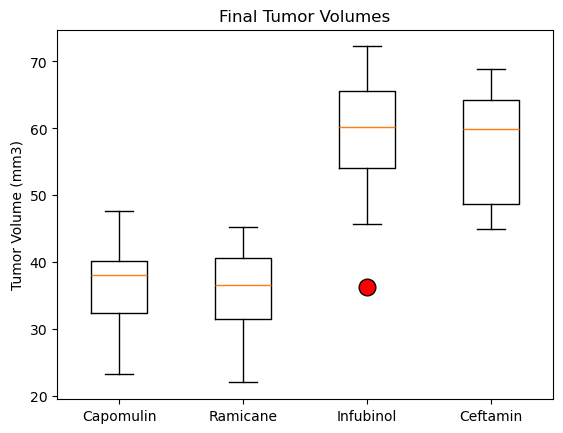

In [158]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(Treatment_list)
outlier = dict(markerfacecolor='red',markersize=12)
box_plot = ax1.boxplot(tumor_volume, flierprops=outlier)
plt.show()

# Line and Scatter Plots

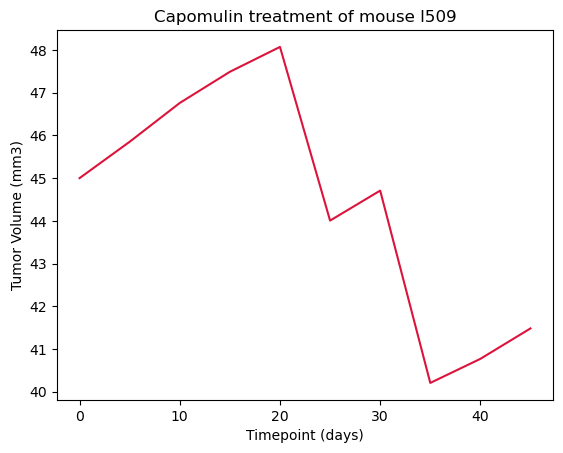

In [161]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_mouse_data=clean_merged_data_df.loc[(clean_merged_data_df["Drug Regimen"] == "Capomulin"),
                                             ["Mouse ID","Tumor Volume (mm3)","Timepoint"]]
l509_data= Capomulin_mouse_data.loc[(Capomulin_mouse_data["Mouse ID"]) == "l509",:]
y_axis = l509_data["Tumor Volume (mm3)"]
x_axis = l509_data["Timepoint"]
l509_mouse_plot = plt.plot(x_axis,y_axis,color = "crimson")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

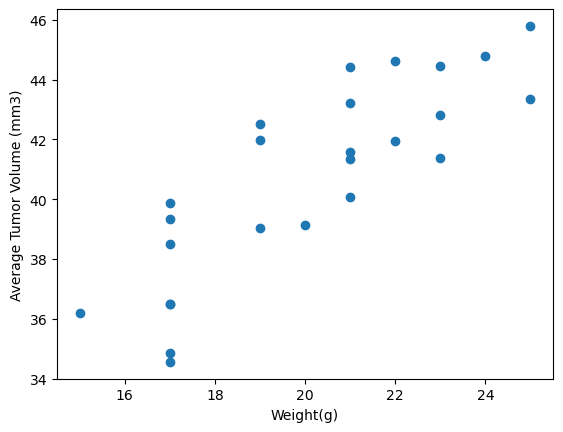

In [162]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data=clean_merged_data_df.loc[(clean_merged_data_df["Drug Regimen"] == "Capomulin"),:]
capomulin_tumor_data=capomulin_data.groupby("Mouse ID")[["Tumor Volume (mm3)","Weight (g)"]].mean()
y_axis = capomulin_tumor_data["Tumor Volume (mm3)"]
x_axis = capomulin_tumor_data["Weight (g)"]
plot = plt.scatter(x_axis,y_axis)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


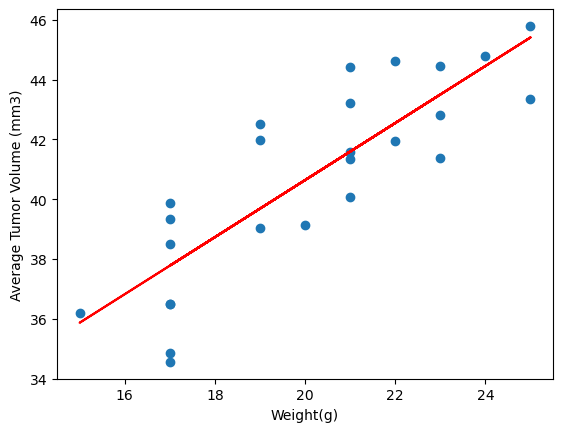

In [164]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(x_axis,y_axis)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_axis,y_axis)
regress_values = x_axis*slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x  + " + str(round(intercept,2))
plot = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()